In [1]:
apikey = 'sS28fU9aZ03yFSpx0QaOSW864llazUDUIr1ShpQroQ6PiVcHRAdFvCLkJB1XMFDX'
secret = 'FNmuJSKqW53yQrWaSxSTF5I1r298xhJQJkkCS38WR7CxeydkBe5N0hfaSu2UBGA8'

In [2]:
#!pip install python-binance pandas mplfinance
#!pip install pandas-datareader


In [3]:
from binance import Client, ThreadedWebsocketManager, ThreadedDepthCacheManager
import pandas as pd
import datetime as dt
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import numpy as np
import csv
from IPython.display import display
from textblob import TextBlob
%matplotlib inline

Binance API Data

In [4]:
client = Client(apikey, secret)

In [ ]:
tickers =client.get_all_tickers()
tickers

In [6]:
tickers[558]

{'symbol': 'DOGEUSDT', 'price': '0.14020000'}

In [7]:
ticker_df = pd.DataFrame(tickers)

In [8]:
ticker_df.set_index('symbol', inplace=True)

In [9]:
ticker_df.loc['DOGEUSDT']

price    0.14020000
Name: DOGEUSDT, dtype: object

In [10]:
historical = client.get_historical_klines('DOGEUSDT', client.KLINE_INTERVAL_1DAY, '1 jan 2016')

In [ ]:
historical


In [12]:
hist_df = pd.DataFrame(historical)

In [13]:
hist_df.head()



,0,1,2,3,4,5,6,7,8,9,10,11
0,1562284800000,0.00449000,0.00460000,0.00355000,0.00387010,1928297660.00000000,1562371199999,7506289.39817290,18589,858403324.00000000,3336426.01151920,0
1,1562371200000,0.00387410,0.00394260,0.00336520,0.00350000,1010744287.00000000,1562457599999,3692804.08878380,17250,522724122.00000000,1908499.50964960,0
2,1562457600000,0.00350400,0.00365000,0.00340000,0.00353770,530613992.00000000,1562543999999,1860353.07168390,9394,275110757.00000000,965093.40977300,0
3,1562544000000,0.00353780,0.00356180,0.00340000,0.00345800,308445688.00000000,1562630399999,1078072.00566180,4958,159456967.00000000,558024.17586270,0
4,1562630400000,0.00346200,0.00358200,0.00335640,0.00345450,253375582.00000000,1562716799999,878528.33377630,5690,115809520.00000000,402047.29506700,0


In [14]:
hist_df.columns = ['Open Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close Time', 'Quote Asset Time', 'Number of Trades', 'TB Base Volume', 'TB Quote Volume', 'Ignore'] 

In [15]:

hist_df.head()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Time,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
0,1562284800000,0.00449000,0.00460000,0.00355000,0.00387010,1928297660.00000000,1562371199999,7506289.39817290,18589,858403324.00000000,3336426.01151920,0
1,1562371200000,0.00387410,0.00394260,0.00336520,0.00350000,1010744287.00000000,1562457599999,3692804.08878380,17250,522724122.00000000,1908499.50964960,0
2,1562457600000,0.00350400,0.00365000,0.00340000,0.00353770,530613992.00000000,1562543999999,1860353.07168390,9394,275110757.00000000,965093.40977300,0
3,1562544000000,0.00353780,0.00356180,0.00340000,0.00345800,308445688.00000000,1562630399999,1078072.00566180,4958,159456967.00000000,558024.17586270,0
4,1562630400000,0.00346200,0.00358200,0.00335640,0.00345450,253375582.00000000,1562716799999,878528.33377630,5690,115809520.00000000,402047.29506700,0


In [16]:
hist_df['Open Time'] = pd.to_datetime(hist_df['Open Time']/1000, unit='s')
hist_df['Close Time'] = pd.to_datetime(hist_df['Close Time']/1000, unit='s')


In [17]:
hist_df.head()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Time,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
0,2019-07-05,0.00449000,0.00460000,0.00355000,0.00387010,1928297660.00000000,2019-07-05 23:59:59.999000064,7506289.39817290,18589,858403324.00000000,3336426.01151920,0
1,2019-07-06,0.00387410,0.00394260,0.00336520,0.00350000,1010744287.00000000,2019-07-06 23:59:59.999000064,3692804.08878380,17250,522724122.00000000,1908499.50964960,0
2,2019-07-07,0.00350400,0.00365000,0.00340000,0.00353770,530613992.00000000,2019-07-07 23:59:59.999000064,1860353.07168390,9394,275110757.00000000,965093.40977300,0
3,2019-07-08,0.00353780,0.00356180,0.00340000,0.00345800,308445688.00000000,2019-07-08 23:59:59.999000064,1078072.00566180,4958,159456967.00000000,558024.17586270,0
4,2019-07-09,0.00346200,0.00358200,0.00335640,0.00345450,253375582.00000000,2019-07-09 23:59:59.999000064,878528.33377630,5690,115809520.00000000,402047.29506700,0


In [18]:
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Quote Asset Time', 'TB Base Volume', 'TB Quote Volume']

In [19]:
hist_df[numeric_columns] = hist_df[numeric_columns].apply(pd.to_numeric, axis=1)


In [20]:
hist_df.tail()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Time,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
992,2022-03-23,0.1224,0.1314,0.1210,0.1298,1.136680e+09,2022-03-23 23:59:59.999000064,1.439026e+08,188709,5.749106e+08,7.278575e+07,0
993,2022-03-24,0.1299,0.1413,0.1277,0.1368,2.168603e+09,2022-03-24 23:59:59.999000064,2.950025e+08,388811,1.087265e+09,1.479231e+08,0
994,2022-03-25,0.1368,0.1377,0.1274,0.1308,1.191949e+09,2022-03-25 23:59:59.999000064,1.590551e+08,181034,5.864342e+08,7.828308e+07,0
995,2022-03-26,0.1308,0.1369,0.1289,0.1360,7.803289e+08,2022-03-26 23:59:59.999000064,1.039666e+08,125845,4.014016e+08,5.347955e+07,0
996,2022-03-27,0.1361,0.1432,0.1354,0.1402,7.704962e+08,2022-03-27 23:59:59.999000064,1.081386e+08,138808,3.882689e+08,5.448631e+07,0


In [21]:
import mplfinance as mpf

In [22]:
hist_df.set_index('Close Time').tail(1460)

,Open Time,Open,High,Low,Close,Volume,Quote Asset Time,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
Close Time,,,,,,,,,,,
2019-07-05 23:59:59.999000064,2019-07-05,0.004490,0.004600,0.003550,0.003870,1.928298e+09,7.506289e+06,18589,8.584033e+08,3.336426e+06,0
2019-07-06 23:59:59.999000064,2019-07-06,0.003874,0.003943,0.003365,0.003500,1.010744e+09,3.692804e+06,17250,5.227241e+08,1.908500e+06,0
2019-07-07 23:59:59.999000064,2019-07-07,0.003504,0.003650,0.003400,0.003538,5.306140e+08,1.860353e+06,9394,2.751108e+08,9.650934e+05,0
2019-07-08 23:59:59.999000064,2019-07-08,0.003538,0.003562,0.003400,0.003458,3.084457e+08,1.078072e+06,4958,1.594570e+08,5.580242e+05,0
2019-07-09 23:59:59.999000064,2019-07-09,0.003462,0.003582,0.003356,0.003455,2.533756e+08,8.785283e+05,5690,1.158095e+08,4.020473e+05,0
...,...,...,...,...,...,...,...,...,...,...,...
2022-03-23 23:59:59.999000064,2022-03-23,0.122400,0.131400,0.121000,0.129800,1.136680e+09,1.439026e+08,188709,5.749106e+08,7.278575e+07,0
2022-03-24 23:59:59.999000064,2022-03-24,0.129900,0.141300,0.127700,0.136800,2.168603e+09,2.950025e+08,388811,1.087265e+09,1.479231e+08,0
2022-03-25 23:59:59.999000064,2022-03-25,0.136800,0.137700,0.127400,0.130800,1.191949e+09,1.590551e+08,181034,5.864342e+08,7.828308e+07,0


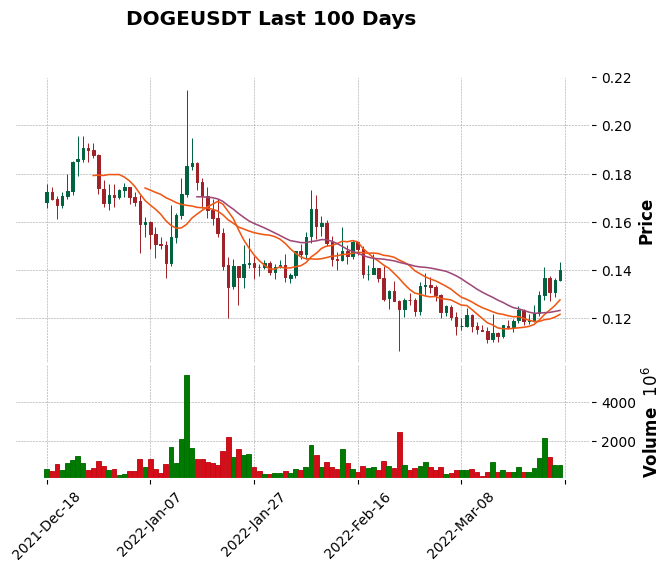

In [23]:
mpf.plot(hist_df.set_index('Open Time').tail(100), 
        type='candle', style='charles', 
        volume=True, 
        title='DOGEUSDT Last 100 Days', 
        mav=(10,20,30))

In [24]:
start = dt.datetime(2020,12,1)
end = dt.datetime(2021,11,1)


In [25]:
doge = web.DataReader('DOGE-USD', 'yahoo', start, end)

doge

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-01,0.003572,0.003269,0.003551,0.003335,80163603,0.003335
2020-12-02,0.003436,0.003293,0.003335,0.003374,58705661,0.003374
2020-12-03,0.003500,0.003352,0.003375,0.003428,47907032,0.003428
2020-12-04,0.003447,0.003285,0.003429,0.003298,45062222,0.003298
2020-12-05,0.003414,0.003268,0.003297,0.003397,43386583,0.003397
...,...,...,...,...,...,...
2021-10-29,0.306312,0.279771,0.299964,0.287853,5866664030,0.287853
2021-10-30,0.294647,0.259888,0.287764,0.268345,3637334331,0.268345
2021-10-31,0.284707,0.252614,0.269239,0.280244,4224104205,0.280244


In [26]:
start = dt.datetime(2021,5,13)
end = dt.datetime(2021,5,15)

In [27]:
doge = web.DataReader('DOGE-USD', 'yahoo', start, end)
doge

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-05-13,0.519461,0.357175,0.392176,0.490374,18663174069,0.490374
2021-05-14,0.589690,0.464622,0.487070,0.559604,20466177002,0.559604
2021-05-15,0.562676,0.491299,0.559668,0.507972,9836892944,0.507972
2021-05-16,0.548145,0.451023,0.507910,0.514895,9541552064,0.514895


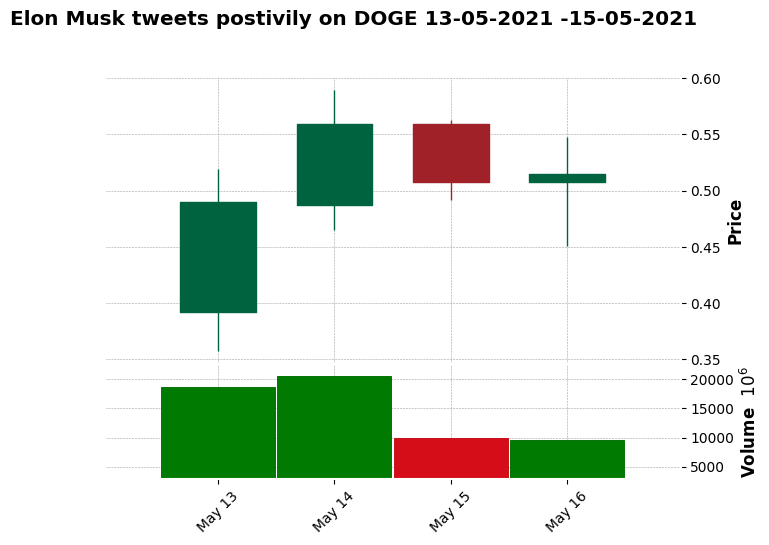

In [28]:
mpf.plot(doge, type = "candle" , volume=True, style="charles", title='Elon Musk tweets postivily on DOGE 13-05-2021 -15-05-2021  ')

In [29]:
start = dt.datetime(2021,5,9)
end = dt.datetime(2021,5,10)


In [30]:
doge = web.DataReader('DOGE-USD', 'yahoo', start, end)
doge

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-05-09,0.697625,0.425706,0.635820,0.570070,46138063928,0.570070
2021-05-10,0.569687,0.421291,0.569687,0.449964,16514521828,0.449964
2021-05-11,0.546651,0.445034,0.450488,0.495231,14566975476,0.495231


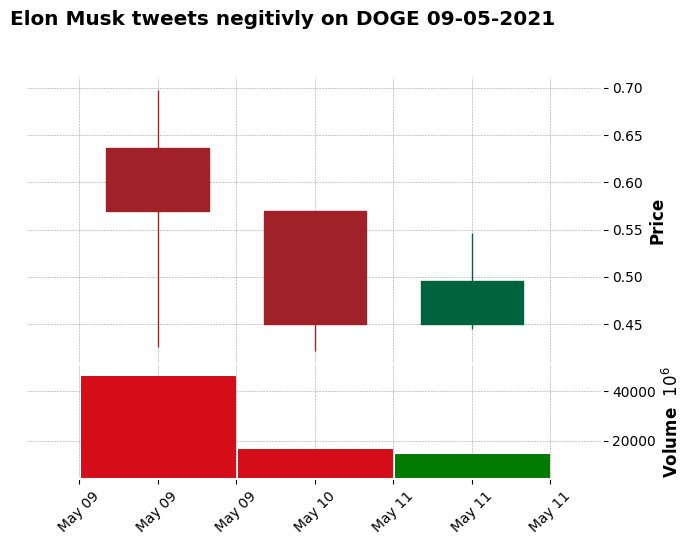

In [31]:
mpf.plot(doge, type = "candle" , volume=True, style="charles", title='Elon Musk tweets negitivly on DOGE 09-05-2021')

In [32]:
start = dt.datetime(2021,8,9)
end = dt.datetime(2021,9,9)

In [33]:
doge = web.DataReader('DOGE-USD', 'yahoo', start, end)
doge

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-08-09,0.266265,0.231410,0.240122,0.256897,4607903346,0.256897
2021-08-10,0.262791,0.245352,0.256366,0.257325,3424415504,0.257325
2021-08-11,0.282482,0.256382,0.257424,0.265263,4732068476,0.265263
2021-08-12,0.294142,0.252775,0.264853,0.263921,5264857508,0.263921
2021-08-13,0.287188,0.261907,0.264249,0.286808,3565092106,0.286808
2021-08-14,0.298456,0.277154,0.286801,0.293113,4677579997,0.293113
2021-08-15,0.348722,0.287063,0.294086,0.341441,8046171669,0.341441
2021-08-16,0.350953,0.310828,0.340165,0.320715,6681324187,0.320715
2021-08-17,0.339462,0.295763,0.319631,0.299442,5699700481,0.299442


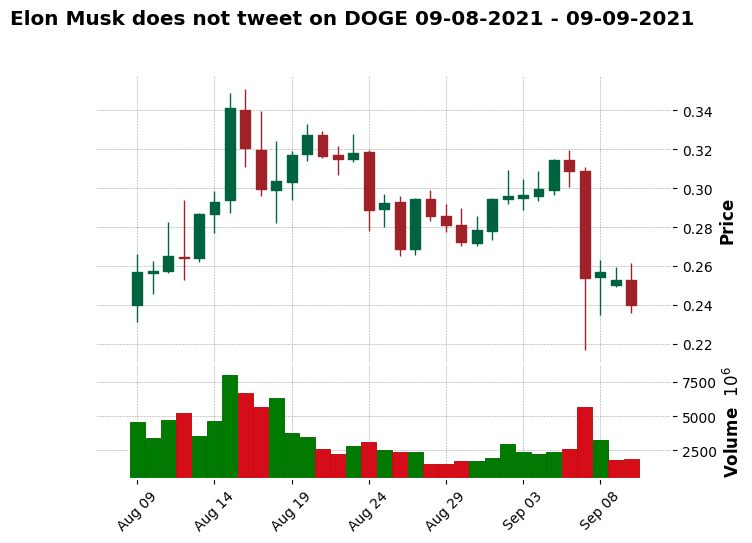

In [34]:
mpf.plot(doge, type = "candle" , volume=True, style="charles", title='Elon Musk does not tweet on DOGE 09-08-2021 - 09-09-2021')

In [35]:
df = pd.read_csv('Dogecoin Historical Data.csv', usecols=['Date', 'High'])
df['Date'] = pd.to_datetime(df['Date'])
df['Pct change'] = df['High'].pct_change().multiply(100)

tweets_df = pd.read_csv('53tweets.csv', usecols=['Date', 'Tweet', 'Time'])
tweets_df['Offset'] = tweets_df['Time'].apply(lambda time: '1 days' if time.find('pm') > -1 else 0)
tweets_df['Date'] = (pd.to_datetime(tweets_df['Date']) + pd.to_timedelta(tweets_df['Offset']))
data = pd.merge(df, tweets_df, on="Date")

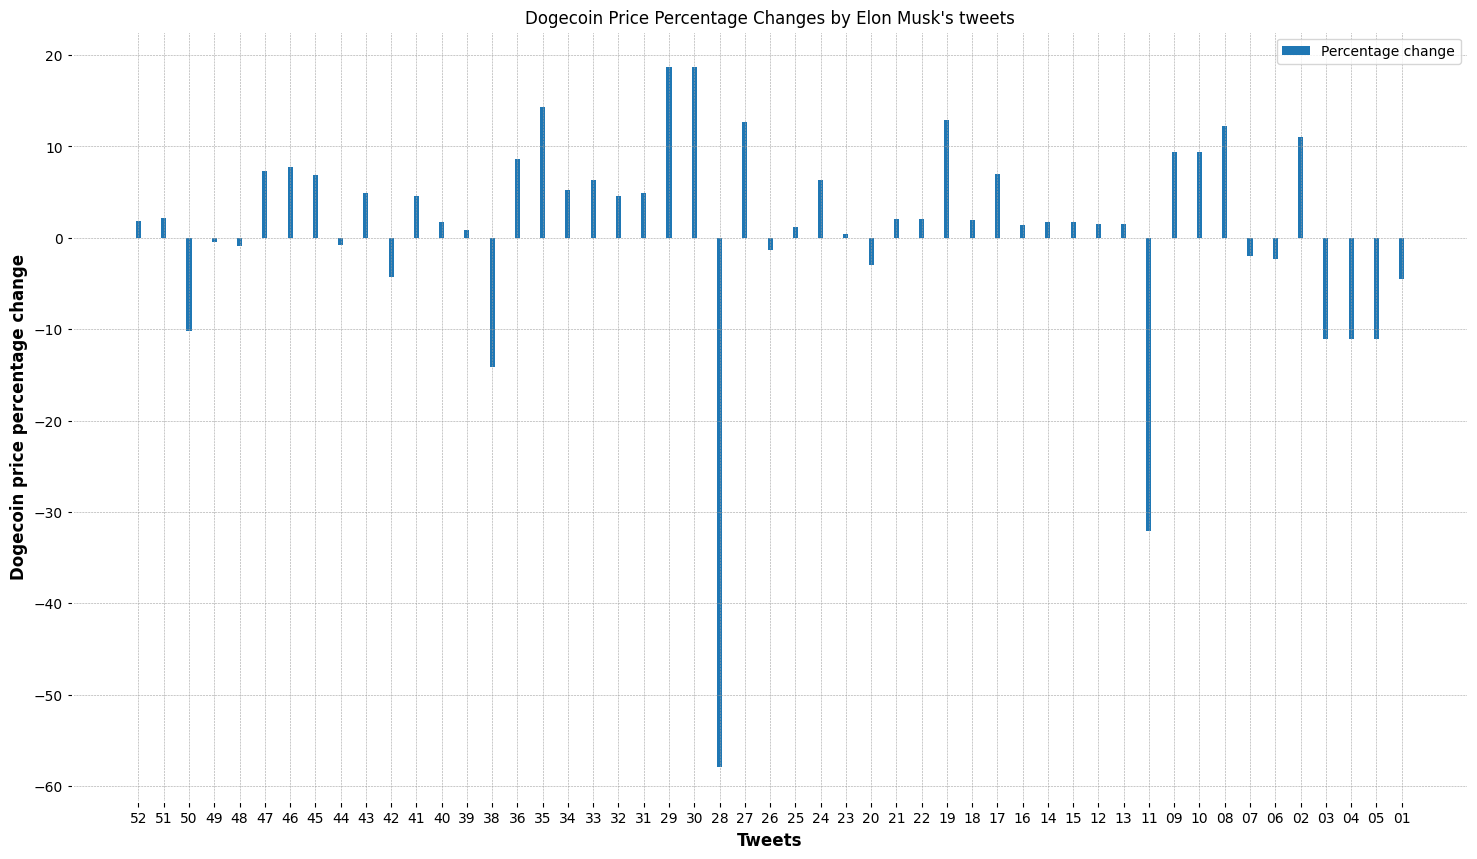

In [36]:
fig, ax = plt.subplots(figsize=(18,10))
width = 0.2
labels = list(map(lambda x: x.replace('tweet', ''), data['Tweet'].values.tolist()))
percentage_change = data['Pct change'].values.tolist()
ax.bar(labels, percentage_change, width, label='Percentage change')
ax.set_ylabel('Dogecoin price percentage change')
ax.set_xlabel('Tweets')
ax. set_title("Dogecoin Price Percentage Changes by Elon Musk's tweets")
ax.legend()
plt.show()

In [37]:
datafile ='53tweets.csv'

In [38]:
raw_data = pd.read_csv(datafile, parse_dates=[0], infer_datetime_format=True)

In [39]:
reindexed_data = raw_data['Tweet']
reindexed_data.index = raw_data['Text']

In [40]:
raw_data.head()


,Tweet,Date,Time,Text
0,tweet01,Dec-02-2017,7:33 pm,"{""Text"":""@highqualitysh1t I love the thought o..."
1,tweet02,Apr-04-2019,10:24 am,"{""Text"":""@Tom_Heats Dogecoin might be my fav c..."
2,tweet03,Apr-02-2019,8:40 pm,"{""Text"":""@dogecoin Uh oh"""
3,tweet04,Apr-02-2019,9:16 pm,"{""Text"":""Dogecoin rulz https://t.co/flWWUgAgLU"""
4,tweet05,Apr-02-2019,9:38 pm,"{""Text"":""Dogecoin value may vary https://t.co/..."


In [41]:
positive_sentence = "dogecoin, doge, dogecoin is for the people, dogecoin is good!"
neutral_sentence = "dogecoin looks okay"
negative_sentence = "dogecoin is bad"

In [42]:
positive_blob = TextBlob(positive_sentence)
neutral_blob = TextBlob(neutral_sentence)
negative_blob = TextBlob(negative_sentence)

In [43]:
print("Positive sentence: ", positive_blob.sentiment)
print("Neutral sentence: ", neutral_blob.sentiment)
print("Negative sentence: ", negative_blob.sentiment)

Positive sentence:  Sentiment(polarity=0.875, subjectivity=0.6000000000000001)
Neutral sentence:  Sentiment(polarity=0.5, subjectivity=0.5)
Negative sentence:  Sentiment(polarity=-0.6999999999999998, subjectivity=0.6666666666666666)


Stopwords


In [44]:
import io
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [45]:
# word_tokenize accepts

stop_words = set(stopwords.words('english'))
file1 = open('data-clensing.csv', encoding= "UTF-8")

In [46]:
line = file1.read()
words = line.split()
for r in words:
    if not r in stop_words:
        appendFile = open('fstop.txt','a', encoding="utf-8")
        appendFile.write(" "+r)
        appendFile.close()



```
Frequency distabution in Tweets collected 

```



In [47]:
import nltk
from nltk.corpus import webtext
from nltk.probability import FreqDist

In [48]:
wt_words = open('fstop.txt', encoding= "UTF-8")
mydata = wt_words.read()
# add individual characters you want to get rid of
for c in "#0123456789£!$%^&*'()""';:-_/?><,.@":
    mydata = mydata.replace(c,"")

for w in ["RT", "date", "http"]:
    mydata = mydata.replace(w, "")


data_analysis = nltk.FreqDist(nltk.tokenize.word_tokenize(mydata))

In [49]:
testString="12333333334566666666"
for c in "123":
    print("Replacing " + c)
    testString = testString.replace(c,"")
print(testString)

Replacing 1
Replacing 2
Replacing 3
4566666666


In [50]:
# Let's take the specific words only if their frequency is greater than 10.
filter_words = dict([(m, n) for m, n in data_analysis.items() if n > 50])

In [51]:
filter_words["dogecoin"]


189334

In [ ]:
for key in sorted(filter_words):
    print("%s: %s" % (key, filter_words[key]))

In [53]:
data_analysis

FreqDist({"''": 1239503, 'dogecoin': 189334, 'BabyDogeCoin': 135189, 'DogelonMars': 126863, 'DOGE': 110953, 'Shiba': 101878, 'SHIB': 99196, '•': 98730, 'Inu': 97207, 'ELON': 95763, ...})

C:\Users\moham\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 28858 (\N{CJK UNIFIED IDEOGRAPH-70BA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\moham\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26367 (\N{CJK UNIFIED IDEOGRAPH-66FF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\moham\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 31859 (\N{CJK UNIFIED IDEOGRAPH-7C73}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\moham\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12489 (\N{KATAKANA LETTER DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\moham\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core

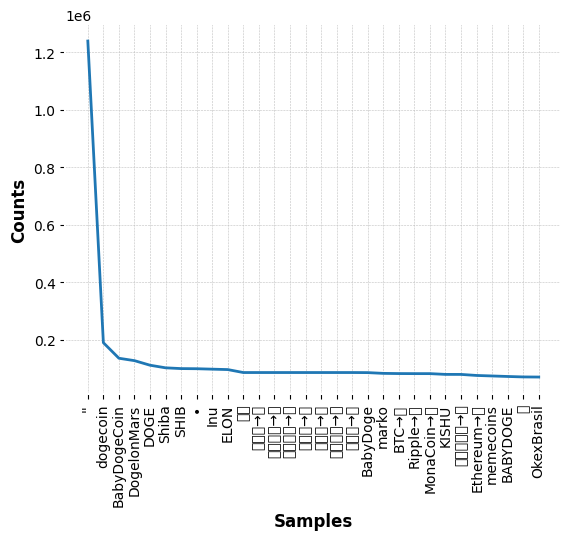

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [54]:
data_analysispost = nltk.FreqDist(filter_words)
 
data_analysispost.plot(30, cumulative=False)


Sentiment Analysis


In [55]:
import numpy as np
import pandas as pd

In [56]:
df = pd.read_csv('data-clensing.csv')

In [57]:
df.shape

(185152, 4)

In [58]:
df.head()

,Date,TweetNo,User,Tweet
0,2022-02-06,1,Filimon1987,RT @hardbitspace: BitTorrent 10000.\nRetweet t...
1,2022-02-06,2,amir_shazrin,RT @ElonPunkYC: Floor went from 5 ETH to 8.6 E...
2,2022-02-06,3,umit587,RT @fzthsyn: Tercihini hangi kedilerden yana ...
3,2022-02-06,4,realwhalehacker,"""The FTX ad with Brady had some charm, it's cu..."
4,2022-02-06,5,hasanKylp33,RT @fzthsyn: Tercihini hangi kedilerden yana ...


In [59]:
import re 
import nltk

nltk.download('stopwords')

from nltk.corpus import stopwords

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [60]:
corpus=[df]

for i in range(46256, 5):
  review = re.sub('[^a-zA-Z]', ' ', df['Tweet'][i])
  review = review.lower()
  review = review.split()
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)


In [61]:
corpus

[              Date  TweetNo             User  \
 0       2022-02-06        1      Filimon1987   
 1       2022-02-06        2     amir_shazrin   
 2       2022-02-06        3          umit587   
 3       2022-02-06        4  realwhalehacker   
 4       2022-02-06        5      hasanKylp33   
 ...            ...      ...              ...   
 185147  2022-03-27   185260       webber__83   
 185148  2022-03-27   185261  ahmedelhattab77   
 185149  2022-03-27   185262        Rashef123   
 185150  2022-03-27   185263       NealSualog   
 185151  2022-03-27   185264        ikenandag   
 
                                                     Tweet  
 0       RT @hardbitspace: BitTorrent 10000.\nRetweet t...  
 1       RT @ElonPunkYC: Floor went from 5 ETH to 8.6 E...  
 2       RT @fzthsyn: Tercihini hangi kedilerden yana  ...  
 3       "The FTX ad with Brady had some charm, it's cu...  
 4       RT @fzthsyn: Tercihini hangi kedilerden yana  ...  
 ...                                        

In [62]:
#@okex_brasil

In [63]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
#Sentiment Analysis
SA = SentimentIntensityAnalyzer()
df["Tweet"]= df["Tweet"].astype(str)
# Applying Model, Variable Creation
df['Polarity Score']=df["Tweet"].apply(lambda x:SA.polarity_scores(x)['compound'])
df['Neutral Score']=df["Tweet"].apply(lambda x:SA.polarity_scores(x)['neu'])
df['Negative Score']=df["Tweet"].apply(lambda x:SA.polarity_scores(x)['neg'])
df['Positive Score']=df["Tweet"].apply(lambda x:SA.polarity_scores(x)['pos'])


# Converting 0 to 1 Decimal Score to a Categorical Variable
df['Sentiment']=''
df.loc[df['Polarity Score']>0,'Sentiment']='Positive'
df.loc[df['Polarity Score']==0,'Sentiment']='Neutral'
df.loc[df['Polarity Score']<0,'Sentiment']='Negative'



df[:100]
#df.to_csv('Sentimental-data.csv')

,Date,TweetNo,User,Tweet,Polarity Score,Neutral Score,Negative Score,Positive Score,Sentiment
0,2022-02-06,1,Filimon1987,RT @hardbitspace: BitTorrent 10000.\nRetweet t...,0.0000,1.000,0.000,0.000,Neutral
1,2022-02-06,2,amir_shazrin,RT @ElonPunkYC: Floor went from 5 ETH to 8.6 E...,0.0000,1.000,0.000,0.000,Neutral
2,2022-02-06,3,umit587,RT @fzthsyn: Tercihini hangi kedilerden yana ...,0.0000,1.000,0.000,0.000,Neutral
3,2022-02-06,4,realwhalehacker,"""The FTX ad with Brady had some charm, it's cu...",0.6908,0.769,0.000,0.231,Positive
4,2022-02-06,5,hasanKylp33,RT @fzthsyn: Tercihini hangi kedilerden yana ...,0.0000,1.000,0.000,0.000,Neutral
...,...,...,...,...,...,...,...,...,...
95,2022-02-06,96,E__dollar,RT @shegzynanah: @W3stSideCryp @marvininu @Mar...,0.6597,0.645,0.089,0.266,Positive
96,2022-02-06,97,HamidJahanfakhr,RT @MemesCoinLover: What is the top #Token com...,0.2023,0.899,0.000,0.101,Positive
97,2022-02-06,98,itnyeinchanko,RT @ElonPunkYC: Floor went from 5 ETH to 8.6 E...,0.0000,1.000,0.000,0.000,Neutral
98,2022-02-06,99,rodamus444,RT @ElonPunkYC: Floor went from 5 ETH to 8.6 E...,0.0000,1.000,0.000,0.000,Neutral


In [64]:
df.loc[df['Polarity Score']>0,'Sentiment']
df['Date']= pd.to_datetime(df['Date'])
dfagg=df.groupby(by='Date').agg('mean')
dfagg[dfagg['Polarity Score']<0]
#dfagg2=dfagg.iloc[:,[1]]
#dfagg2.to_csv('dfagg2.csv')
dfagg

,TweetNo,Polarity Score,Neutral Score,Negative Score,Positive Score
Date,,,,,
2022-02-06,1086.000000,0.259914,0.875484,0.021574,0.103003
2022-02-07,3235.500000,0.215312,0.908980,0.010099,0.080921
2022-02-08,5354.500000,0.149469,0.932775,0.009386,0.057860
2022-02-09,7489.500000,0.289365,0.890400,0.004510,0.105106
2022-02-10,9651.500000,0.193530,0.898696,0.017984,0.082852
2022-02-11,11821.000000,0.046951,0.978486,0.002677,0.018851
2022-02-12,13965.500000,0.130821,0.941084,0.004304,0.054614
2022-02-13,15881.000000,0.113200,0.951089,0.006327,0.042584
2022-02-14,17339.500000,0.367391,0.830916,0.033026,0.136046


In [65]:
dfagg2=dfagg.iloc[:,[1]]
#dfagg2.to_csv('dfagg2.csv')
dfagg2

,Polarity Score
Date,
2022-02-06,0.259914
2022-02-07,0.215312
2022-02-08,0.149469
2022-02-09,0.289365
2022-02-10,0.193530
2022-02-11,0.046951
2022-02-12,0.130821
2022-02-13,0.113200
2022-02-14,0.367391


Mering the data from the web scraper and the polarity scores from the daily sentiment


In [66]:
#mergedf = pd.merge(doge, dfagg, on='Date', how='inner')

In [81]:
mergedf = pd.concat([doge, dfagg2], axis=1, sort=True, join='inner')

In [82]:
mergedf

,Open,High,Low,Close,Adj Close,Volume,MarktCap,MA50,MA200,returns,Polarity Score
Date,,,,,,,,,,,
2022-02-06,0.147140,0.154775,0.145258,0.153770,0.153770,757004142,1.113856e+08,NaN,NaN,0.045052,0.259914
2022-02-07,0.153803,0.171586,0.151741,0.165578,0.165578,1791358822,2.755164e+08,NaN,NaN,0.076790,0.215312
2022-02-08,0.165606,0.169145,0.153709,0.158405,0.158405,1190116000,1.970904e+08,NaN,NaN,-0.043321,0.149469
2022-02-09,0.158357,0.160704,0.155035,0.159123,0.159123,778670798,1.233080e+08,NaN,NaN,0.004533,0.289365
2022-02-10,0.159145,0.160437,0.151497,0.151889,0.151889,1053630584,1.676800e+08,NaN,NaN,-0.045462,0.193530
2022-02-11,0.151895,0.154069,0.143349,0.144847,0.144847,776730555,1.179815e+08,NaN,NaN,-0.046363,0.046951
2022-02-12,0.144856,0.147013,0.141678,0.144405,0.144405,602699408,8.730463e+07,NaN,NaN,-0.003051,0.130821
2022-02-13,0.144379,0.157354,0.144031,0.148948,0.148948,1581065491,2.282727e+08,NaN,NaN,0.031460,0.113200
2022-02-14,0.148869,0.150132,0.143649,0.146003,0.146003,898042727,1.336907e+08,NaN,NaN,-0.019772,0.367391


testing web scraper 

In [69]:
start = dt.datetime(2022,3,24)
end = dt.datetime(2022,3,26)

In [70]:
doge = web.DataReader('Mona-USD', 'yahoo', start, end)
doge

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-03-24,0.981590,0.953585,0.974083,0.954097,489069,0.954097
2022-03-25,0.984148,0.950223,0.954149,0.955652,671498,0.955652
2022-03-26,1.001894,0.954017,0.955664,0.985116,853500,0.985116
2022-03-27,0.998603,0.979893,0.980598,0.990143,948698,0.990143


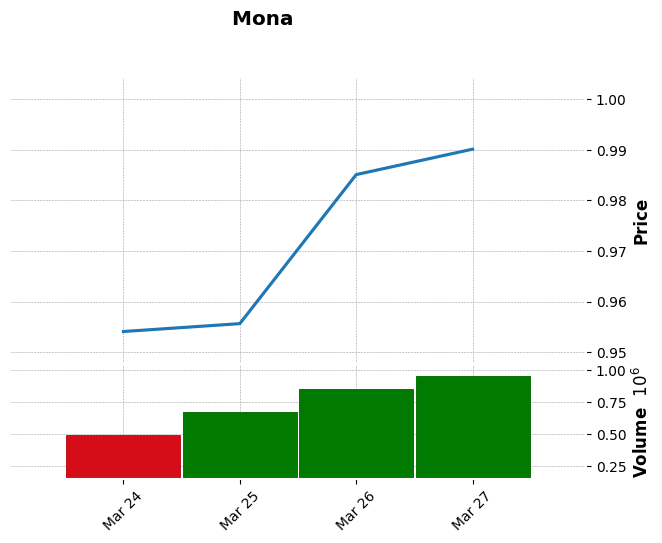

In [71]:
mpf.plot(doge, type = "line" , volume=True, style="charles", title='Mona ')

plotting all the coins respective of the days the data gathered

In [72]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import yfinance as yf
%matplotlib inline

In [73]:
start = "2022-1-06"
end = '2022-3-24'
doge = yf.download('DOGE-USD',start,end)
mona = yf.download('MONA-USD',start,end)
shib = yf.download('SHIB-USD',start,end)
soma = yf.download('SAMO-USD',start,end)
elon = yf.download('ELON-USD',start,end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Exploratory Analysis

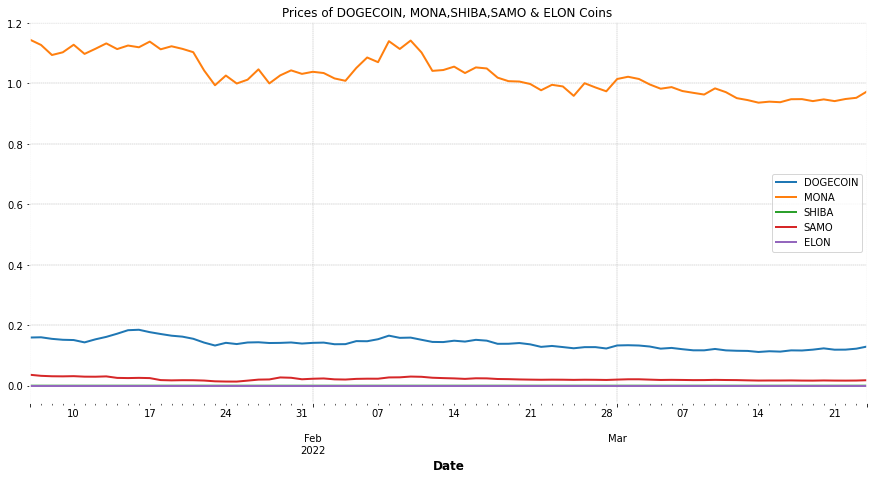

In [74]:
doge['Open'].plot(label = 'DOGECOIN', figsize = (15,7))
mona['Open'].plot(label = 'MONA')
shib['Open'].plot(label = 'SHIBA')
soma['Open'].plot(label = 'SAMO')
elon['Open'].plot(label = 'ELON')
plt.title('Prices of DOGECOIN, MONA,SHIBA,SAMO & ELON Coins ')
plt.legend()

Volume Traded

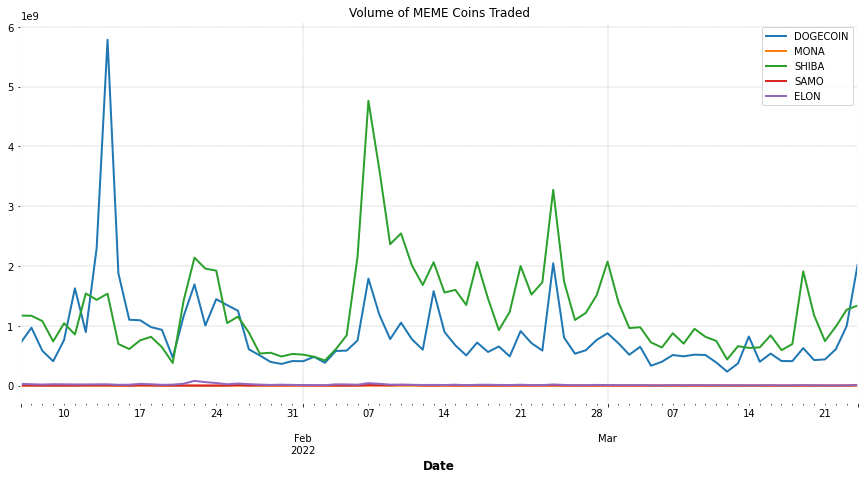

In [75]:
doge['Volume'].plot(label = 'DOGECOIN', figsize = (15,7))
mona['Volume'].plot(label = "MONA")
shib['Volume'].plot(label = 'SHIBA')
soma['Volume'].plot(label = "SAMO")
elon['Volume'].plot(label = 'ELON')
plt.title('Volume of MEME Coins Traded')
plt.legend()

Market Capitalisation

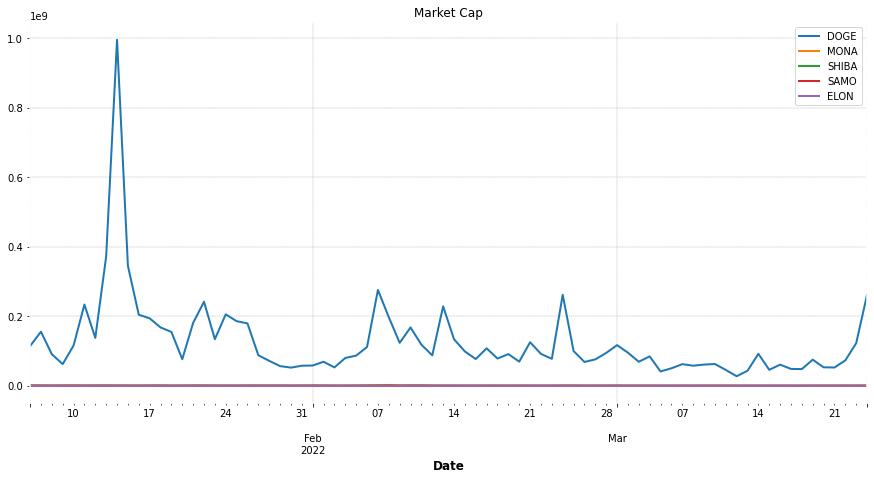

In [76]:
doge['MarktCap'] = doge['Open'] * doge['Volume']
mona['MarktCap'] = mona['Open'] * mona['Volume']
shib['MarktCap'] = shib['Open'] * shib['Volume']
soma['MarktCap'] = soma['Open'] * soma['Volume']
elon['MarktCap'] = elon['Open'] * elon['Volume']
doge['MarktCap'].plot(label = 'DOGE', figsize = (15,7))
mona['MarktCap'].plot(label = 'MONA')
shib['MarktCap'].plot(label = 'SHIBA')
soma['MarktCap'].plot(label = 'SAMO')
elon['MarktCap'].plot(label = 'ELON')
plt.title('Market Cap')
plt.legend()

Moving Average DOGECOIN

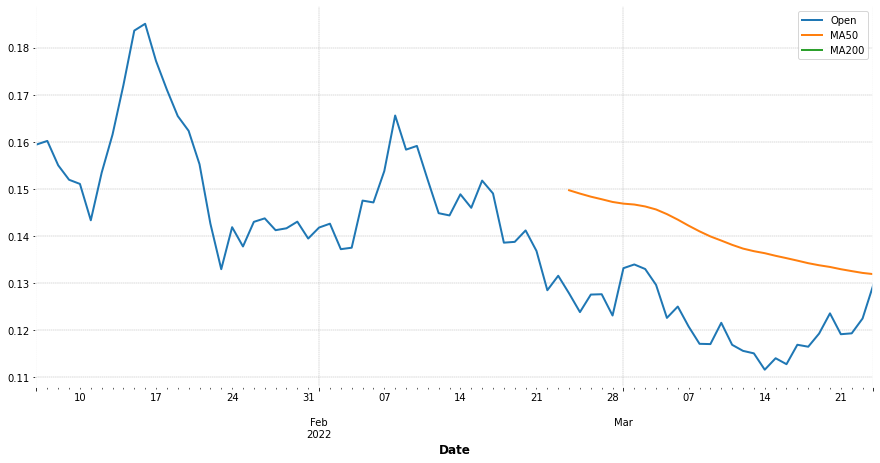

In [77]:
doge['MA50'] = doge['Open'].rolling(50).mean()
doge['MA200'] = doge['Open'].rolling(200).mean()
doge['Open'].plot(figsize = (15,7))
doge['MA50'].plot()
doge['MA200'].plot()
plt.legend()

Percentage increase in Coins value

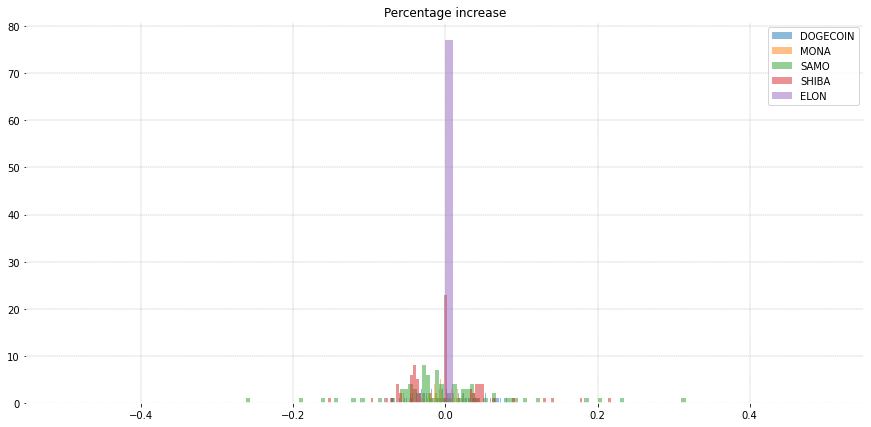

In [78]:
doge['returns'] = (doge['Close']/doge['Close'].shift(1)) -1
mona['returns'] = (mona['Close']/mona['Close'].shift(1))-1
soma['returns'] = (soma['Close']/soma['Close'].shift(1)) - 1
shib['returns'] = (shib['Close']/shib['Close'].shift(1))-1
elon['returns'] = (elon['Close']/elon['Close'].shift(1)) - 1
doge['returns'].hist(bins = 100, label = 'DOGECOIN', alpha = 0.5, figsize = (15,7))
mona['returns'].hist(bins = 100, label = 'MONA', alpha = 0.5)
soma['returns'].hist(bins = 100, label = 'SAMO', alpha = 0.5)
shib['returns'].hist(bins = 100, label = 'SHIBA', alpha = 0.5)
elon['returns'].hist(bins = 100, label = 'ELON', alpha = 0.5)
plt.title('Percentage increase')
plt.legend()

LSTM testing 

In [79]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [ ]:
df = pd.read_csv('fstop.txt')
# Slice [start:stop:step], starting from index 5 take every 6th record.
df = df[5::6]

date_time = pd.to_datetime(df.pop('Tweet'), format='%d.%m.%Y %H:%M:%S')